# <center>20-21 52954 - Machine Learning and Statistics</center>
# <center>Assessment 2020</center>
***

## Task 1. October 5th, 2020: 
Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

### Solution

In [1]:
# Libraries required for this solution
import numpy as np # Efficient numeric arrays
import math # Module containing mathematical functions, including square root 
import matplotlib.pyplot as plt # Used to help create basci plots
import decimal # Module that will allow expreesion of a number as a decimal rather than a float

### 1.1 Introduction

In python, there is a simple means of calculating the square root of a number, using the sqrt function contained in the math library in python. However, it is important to know that this calculation is only an approximation of the square root of a number, albeit a very accurate approximation for humans. This is highlighted below.

In [2]:
# To calculate the square root of 2, we can use the sqrt function contained in the math library
math.sqrt(2)

1.4142135623730951

Extenuating this, we can plot and view the sqrt() function. Below, we will plot and view the sqrt function up to the value of 10, as below, where x is taken as 1000 points between 0 and 10, linearly spaced, and y is the square root of that number.

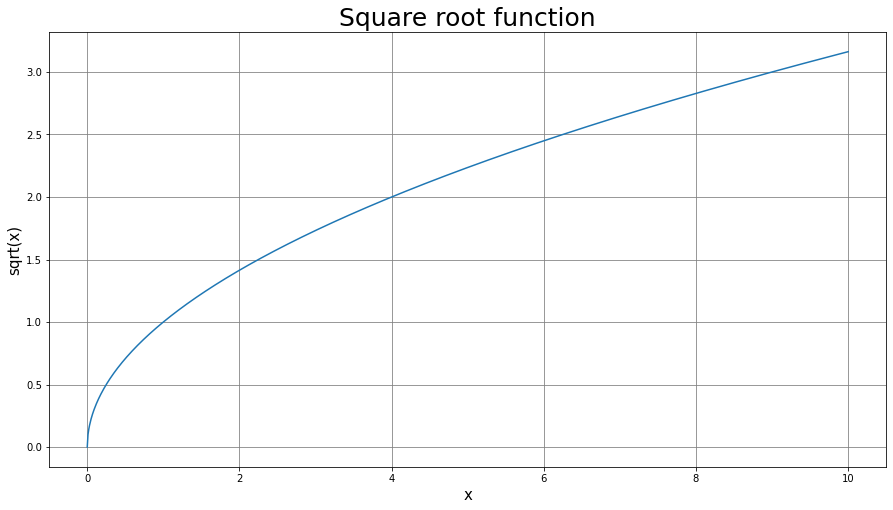

In [3]:
# Create a plot of x vs sqrt(x) from 0 to 10 with 1000 intervals
x = np.linspace(0.0, 10.0, 1000)
y = np.sqrt(x)

# Resize the output figure
plt.rcParams['figure.figsize'] = (15,8)
plt.title('Square root function', size=25)
plt.xlabel('x', size=15)
plt.ylabel('sqrt(x)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')

plt.plot(x,y)
plt.show()

Using the in-built sqrt() function yields a value of 1.4142135623730951 for sqrt(2). "This is a floating point representation, or aproximation, of the true value of the binary approximation stored by the machine." [1] To explain this, we must first understand that floating point numbers are represented in a computer as binary (base 2) fractions, and that these binary fractions are actually an approximation of the actual number. For example, consider an irrational number, which is a number that has an infinite number of decimal places with no repeating pattern. A computer must represent this in some way, so the binary representation of this will be an approximation of the actual number. However, us humans like to deal in decimal (base 10), and most decimal floating points cannot be exactly be exactly represented as binary fractions. As a result, the decimal number on our computer screen is actually an approximation of the binary floating point number, which in turn is an approximation of the actual number. These approximations are generally very accurate and not nociceable by the user, however they can cause error and this is something we should always be aware of in floating point arithmetic. Above, we use the sqrt() function contained in the math library. This result is an approximation of the actual number, due to the constraints explained above, a point which is proven by the below calculation.

In [4]:
# The square of math.sqrt(2) should be 2
math.sqrt(2) * math.sqrt(2)

2.0000000000000004

### 1.2  Square Root Algorithm using the Babylonian method

This task requests that we calculate the square root of 2 using our own algorithm and not that from the standard library. Perhaps the first method for approximating the square root of a number was the Babylonian Method, also known as Heron's Method, named after the Greek Mathmetician Heron of Alexandria in AD60. [2] This method is based on the idea that if z is an overestimate to the square root of a non-negative real number x then x/z will be an underestimate, or vice versa, and so the average of these two numbers may reasonably be expected to provide a better approximation than z. Expressed in mathematical terms, the square root $z$ of a number $x$ can be approximated using the following mathematics:

$$ z_{next} = \frac{\frac{x}{z} + {z}}{2} $$

Iterating this principle will converge on a more accurate result each time.\

Using this equation, python code can be written for a function to calculate the square root of a given number, making use of a while loop, as shown below. [3]. For this task, we are asked to focus on the square root of 2.

As noted above, floating point arithmetic using the float datatype has limitations with accuracy. The decimal module offers a Decimal datatype for decimal floating point arithmetic.[4] Compared to the built-in float implementation of binary floating point, using decimal is especially helpful for situations where rounding is required during calculation, or certain precision of the above approximations is required. We will employ the decimal module for our algorithm.

In [5]:
def sqrt2():
    """
    A function to calculate the square root of the number 2 using the Babylonian Method
    """
   # Set the decimal place precision to 100
    with decimal.localcontext() as ctx:
        ctx.prec = 100
    # Make an initial estimate for the square root z
        z = decimal.Decimal(2/2.0);
    # Declare an initial value for z2, which is different to z
        z2 = z + 1;
    # Loop until z = z2. Initially starting 1 apart, the values of z and z2 in the while loop will converge towards each 
    # other
        while (z != z2):
        # Calculate a better estimate for z
            n = decimal.Decimal(2/ z);
            z2 = z;
            z = decimal.Decimal((n + z)/2);
    
    # return the better estimate for z
        return z;

In [6]:
# Call the sqrt2() function
print(sqrt2())

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


### 1.3 Testing of the algorithm
We all know that multiplying the square root of a number by itself, we should get the number. Let's try with the above function

In [7]:
sqrt2() * sqrt2()

Decimal('2.000000000000000000000000000')

Above is a quick verifictaion of the function. Let's now compare it to the value obtained by using the function contained in the python standard library

In [8]:
math.sqrt(2) * math.sqrt(2)

2.0000000000000004

Although the two results look very close, they differ very slightly. We can see that the sqrt2() function yields a more accurate result that the in-built python math.sqrt(2), as shown when value is squared and compared to 2. 

### References
[1] https://docs.python.org/3.8/tutorial/floatingpoint.html<br>
[2] https://en.wikipedia.org/wiki/Methods_of_computing_square_roots <br>
[3] https://www.w3resource.com/python-exercises/math/python-math-exercise-18.php <br>
[4] https://docs.python.org/3.8/tutorial/stdlib2.html#decimal-floating-point-arithmetic

***

## Task 2. November 2nd, 2020: 
The purpose of this task is to use scipy-stats to verify a result for the chi-squared value on a set of data. In addition to this, we are asked to calculate the associated p value.

### Solution
###  2.1 Explanation of chi-squared test

The Chi-squared test for independence is a statistical hypothesis test. It is used to analyse whether two categorical variables are independent. Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.[1] To best explain this, consider the example given in the above referenced link:\
Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar".

||A|B|C|D|Total|
|-|-|-|-|-|-|
|White collar|90|60|104|95|349|
|Blue collar|30|50|51|20|151|
|No collar|30|40|45|35|150|
|----------------|--|--|---|--|---|
|Total|150|150|200|150|650|

The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. Assuming the null hypothesis, the chi-squared test takes the cumulative totals of categories (number of people is each category, and overall totals). From these totals, it calculates expected frequencies within each category, based on the null hypothesis. Finally it compares these expected frequencies with the observed frequencies for each observed frequency.

$$ x = \frac{(expected - observed)^2}{expected} $$

The chi-squared statistic is the sum of all x. 

So, for the above data, the expected frequency of "white collar" in Neighbourhood A would be:

$$ 150\times\frac{349}{650} \approx80.54 $$

The observed frequency of "white collar" in Neighbourhood A is 90

Using these values, we calculate x to be:

$$ \frac{(80.54 - 90)^2}{80.54} \approx 1.1 $$

The chi-squared statistic is calculated by suming the values obtained for x for all observed values in the table. Analysing the result, the lower the value calculated for this statistic, the closer the data is to the null hypothesis. If the test statistic is improbably large according to that chi-squared distribution, then one rejects the null hypothesis of independence.

### 2.2 Using python to calculate chi-squared statistic and associated p value

In [9]:
# Libraries required for this solution
import numpy as np # Efficient numeric arrays
from scipy.stats import chi2_contingency # scipy-stats contains probability distributions and statistical functions

Create a numpy array of observed data

In [10]:
obs = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])
obs

array([[ 90,  60, 104,  95],
       [ 30,  50,  51,  20],
       [ 30,  40,  45,  35]])

Using chi2_contingency function in scipy-stats, calculate the chi-squared statistic and associated p value for the above data [2], [3]

In [11]:
chi2_contingency(obs)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

This confirms the chi-squared statistic for this data to be 24.5712028585826

### 2.3 Interpreting the results

The test statistic for this data is 24.5712028585826 \
The p value is 0.0004098425861096696 \
The degrees of freedom is 6

As stated in the explanation above,the lower the value calculated for this statistic, the closer the data is to the null hypothesis. If the test statistic is improbably large according to that chi-squared distribution, then one rejects the null hypothesis of independence. In this case, with a test statistic of 24, one may be unsure whether to accept/reject the null hypothesis.

Another means of confirming the null hypothesis is the p value. The p value is the probability of observing a sample statistic as extreme as the test statistic. [4] In this case, assuming the null hypothesis  that each person's neighborhood of residence is independent of the person's occupational classification, there is a 0.04% probability of getting a chi-squared statistic of > 24.57. This implies that the null hypothesis would be rejected on this data

### References
[1] https://en.wikipedia.org/wiki/Chi-squared_test <br>
[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html <br>
[3] https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af <br>
[4] https://stattrek.com/chi-square-test/independence.aspx#:~:text=The%20P%2Dvalue%20is%20the%20probability%20that%20a%20chi%2Dsquare,Interpret%20results.

***

## Task 3. November 16th, 2020: 
Research these Excel standard deviation functions of STDEV.P and STDEV.S, noting the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 

### Solution

### 3.1 Standard Deviation

Standard deviation is a measure of the amount of variation in a set of numbers. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.[1] Below shows a bell curve of how you would expect normal data to fall around an average point. 

![StandardDeviation](Images/StandardDeviation.PNG)
[2]<br>
For example, if you were to measure the height of the male population of adults between the age of 30 and 50 in a country, you would get a similar shape distribution of height around the mean/average height. The majority of people would have heights close around the average and the further you drift from the average height, the less number of people you would expect to measure. To emphasise this, you would expect to find the majority of the population between 5'7 and 6'2, and you would expect very few people at 4'8 or 6'7. Standard deviation calculates how far from the average of the dataset lie 68% of the population. If the standard deviation is a relatively small figure, then this signifies that the dataset is tight to the mean, wheras a large standard deviation indicates the dataset is more spread out.

### 3.2 STDEV.P vs STDEV.P

In calculating the standard deviation of a population, depending on whether it is the standard deviation of a <b>sample</b> of the population or the standard deviation of the <b>entire</b> population that is being calculated, slightly different formulae are used.<br>
If you are calculating the standard deviation of the entire population/dataset the following formula is used:
$$ STDEV.P = \sqrt{\frac{1}{N}\sum({x - \bar{x})^2}} $$

If you are calculating the standard deviation of a sammple of the-1 population/dataset the following formula is used:
$$ STDEV.S = \sqrt{\frac{1}{N-1}\sum({x - \bar{x})^2}} $$

As can be seen, the difference between the two equations is the denominator being N for the entire population, whereas it is N -1 for the sample of the population. When dealing with only samples of the population, it turns out that dividing by N-1 is a more accurate estimator of the standard deviation of the population than dividing N. This can be reasoned by arguing that the entire population incorporates all the data known, meaning that all extremities of data are known. Hence the mean, and the variance around this mean is decided. However, when using only a sample of the population, all extremities of the data will not be included. When calculating the mean of the sample, it is possible that the same mean as that calculated for the entire population is observed. But, the variance around the mean of the sample will always be smaller than what the variance of the full population is. Dividing by N for the sample represents this underestimation of the variance. To compensate for this, we divide by N - 1 for a sample - By dividing by a smaller number we are increasing the overall calculation for the standard deviation of the sample, but this is in fact a more accurat estimation than if we were to divide by N. We will run a simulation to confirm that using N-1 for a sample is better estimate for the standard deviation of the entire population than using N.[3]

### 3.3 Simulation

In [12]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Generate 100 random numbers to be used to represent a population

In [13]:
# Create a list of 100 numbers of normal random distribution around the number 10
# pandas.DataFrame is a two-dimensional tabular data structure ie Rows and Columns
df = pd.DataFrame(np.random.normal(10, 2, 100), columns=list('A'))
df

,A
0,8.812851
1,6.170169
2,11.390966
3,9.916552
4,9.623966
...,...
95,11.691022
96,10.636536
97,10.269443
98,13.171463


Graphically show what these randon numbers look like on a bar chart

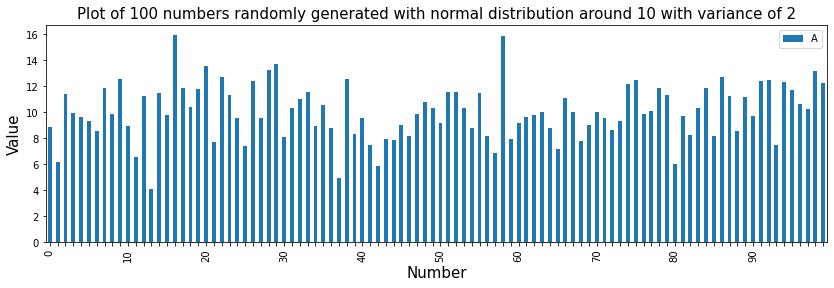

In [14]:
# Adjust the output plot sizes to be full page width
plt.rcParams['figure.figsize'] = (14,4)
# Plot a bar chart displaying each f the random numbers generated
ax = df.plot(kind='bar')
# Adding plot titles and axis labels, with font size adjustments
plt.title('Plot of 100 numbers randomly generated with normal distribution around 10 with variance of 2', size=15)
plt.xlabel('Number', size=15)
plt.ylabel('Value', size=15)
# Adjust the x-axis ticks to only display every 10th tick label. 
# https://stackoverflow.com/questions/56095446/pandas-plot-bar-show-every-nth-xlabel
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
      t.set_visible(False)

As can be seen, these random numbers vary around the number 10 according to a normal distribution and a variance of 2. The Standard Deviation of this population is calculated below, using the STDEV.P equation above

In [15]:
# Select colum A from the dataframe, containing the 100 randomly geerated numbers
x = df['A']
# Calculate STDEV.P of the entire population of x, using the STDEV.P equation above
a = np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)))
a

2.121756410377587

Now, we will run a simulation to pick 1000 different samples of different sizes from the above population, calculate the sttandard deviation of the sample using both STDEV.S and STDEV.P equations, and calculate the mean of each of the results over the 1000 iterations. We will compare the accuracy of each with the result we obtained above for the standard deviation of the entire population above (ie a) 

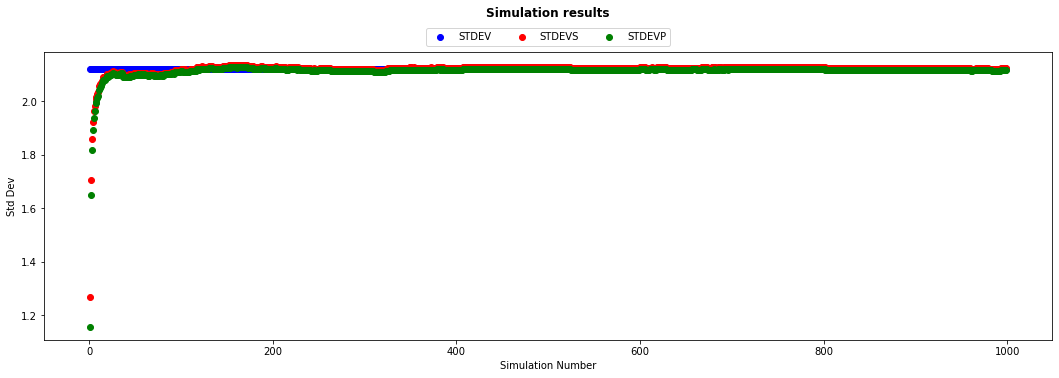

Std Dev of entire Population is: 2.121756410377587
The estimated Std Dev of the population, using STDEV.S of 1000 samples within the Population is: 2.122968968804939
The estimated Std Dev of the population, using STDEV.P of 1000 samples within the Population is 2.115797549804908
Accuracy of STDEV.S of a sample:  0.0012125584273521284
Accuracy of STDEV.p of a sample:  0.005958860572679026
STDEV.S is a more accuratete estimation of Std Dev of population than STDEV.P


In [16]:
# Initialise b and c used below
b = 0
c = 0
index = []
STDEV = []
STDEVS = []
STDEVP = []

for i in range(1,1000):
    # Select a random integer between 2 and 100. This will consitiute the size of the sample
    rand = np.random.randint(2, 1000)
    # Take a random sample of size "rand" from the population.
    # https://docs.scipy.org/doc//numpy-1.10.4/reference/generated/numpy.random.choice.html
    y = np.random.choice(x, rand)
    # Calculate STDEV.S of this sample
    b = b + np.sqrt(np.sum((y - np.mean(y))**2)/(len(y)-1))
    # Calculate the total of STDEV.S so far calculated
    meanb = b/i
    #print(meanb)
    # Calculate STDEV.P of this sample
    c = c + np.sqrt(np.sum((y - np.mean(y))**2)/(len(y)))
    # Calculate the total of STDEV.S so far calculated
    meanc = c/i
    #print(meanb, meanc)
    index.append(i)
    STDEV.append(a)
    STDEVS.append(meanb)
    STDEVP.append(meanc)
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(index,STDEV, label='STDEV', color='b')
#ax = fig.add_subplot(132)
ax.scatter(index,STDEVS, label='STDEVS', color='r')
#ax = fig.add_subplot(133)
ax.scatter(index,STDEVP, label='STDEVP', color='g')
plt.title("Simulation results", pad=35, fontweight='bold')
plt.xlabel("Simulation Number")
plt.ylabel("Std Dev")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.show()


# Print the Standard Deviation of the entire population
print("Std Dev of entire Population is:", a) 
# Print the mean of the STDEV_S calculated over the 100 simulation
print("The estimated Std Dev of the population, using STDEV.S of 1000 samples within the Population is:",meanb)
# Print the mean of the STDEV_P calculated over the 100 simulation
print("The estimated Std Dev of the population, using STDEV.P of 1000 samples within the Population is", meanc)
# Print True/False that STDEV.S of the samples is closer to the Standard Deviation of the population than the STDEV.P
print("Accuracy of STDEV.S of a sample: ", abs(a - meanb))
print("Accuracy of STDEV.p of a sample: ", abs(a - meanc))      
if(abs(a - meanb) < abs(a - meanc)):
    print("STDEV.S is a more accuratete estimation of Std Dev of population than STDEV.P")
else:
    print("STDEV.S is not a more accuratete estimation of Std Dev of population than STDEV.P")

### References
[1] https://en.wikipedia.org/wiki/Standard_deviation <br>
[2] https://towardsdatascience.com/using-standard-deviation-in-python-77872c32ba9b <br>
[3] https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/another-simulation-giving-evidence-that-n-1-gives-us-an-unbiased-estimate-of-variance

***

## Task 4 - November 30th 2020

Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.

## Solution

### 4.1 The Iris data set

The Iris data set contains a total of 150 records - 50 records per specie, for 3 species of Iris: Iris Setosa, Iris Versicolor, and Iris Virginica. Within each record there are 5 attributes: the Sepal length, the Sepal width, the Petal length, the Petal width, and the specie name.

In [17]:
# Machine learning - KMeans.
import sklearn.cluster as skcl

In [18]:
# Read in the iris dataset from a saved csv file
df = pd.read_csv('Data/iris.csv', index_col=None)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


This data set and subsequent analysis has proven very valuable in many area's, including machine learning, because of the interesting statistical properties containied within the data set. Let's start by plotting some characteristics of the data set from the dataset.

### 4.2 Observed data

Using the above data set, knowing the specie of each Iris surveyed, we can plot characteristics of the data on a per-specie basis. For example, we can plot the Sepal length vs Sepal width and compare across the species.

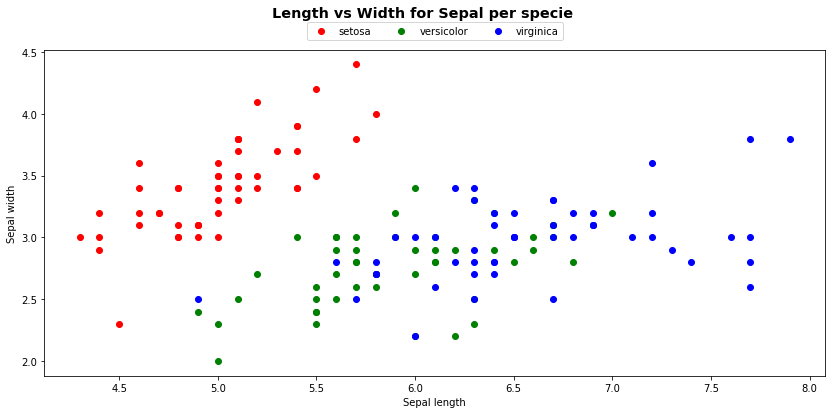

In [19]:
# Input a global title
fig = plt.figure(figsize=(14,6))
st = fig.suptitle("Length vs Width for Sepal per specie", fontsize="x-large", fontweight="bold")

# Plot the ratio of Sepal length to Sepal width
for name, group in df.groupby("species"):   # plot the data by specie. [1]
    if name=='setosa':
        colors = ['red'] 
    elif name=='versicolor':
        colors = ['green']
    else:
        colors = ['blue']
    plt.scatter(group['sepal_length'], group['sepal_width'], label=name, color = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

In plotting the Sepal length vs the sepal width and colour coding per specie name, we can see that Setosa are almost distinctly identifiable, as shown in red. However, dintinguishing between Versicolor and Virginica proves more difficult.

### 4.3 Modelled data

Now, suppose we were given the iris data set without the species being listed. What kind of analysis could we use on the data set to dicpher any distinctions within the data and how accurate would this analysis be when comparing to the real world? 

One such analysis would be K-means analysis, which is a clustering algorithm used in machine learning to group data into a specified number of distinct clusters. Using the data given, the algorithm divides the data set into a number of specified clusters. Each cluster will have a calculated centre such that all the data points in each cluster are closer to their cluster centre than any of the other cluster centres.

In [20]:
# Extract data for sepal length and sepla width from the iris data set
df1 = df.loc[:, ['sepal_length', 'sepal_width']]

In [21]:
# Perform kmeans fitting, usisng KMeans algorithm imported with sklearn.cluster [3]. Number of clusters chosen is 3
kmeans1 = skcl.KMeans(n_clusters=3, random_state=0).fit(df1)

In [22]:
# Assign labels for each data according to the clusters decided by KMeans algorithm [4] 
cluster1 = pd.Series(kmeans1.labels_)

In [23]:
# Add this cluster column to the data 
df1['cluster'] = pd.Series(kmeans1.labels_)

In [24]:
df1

,sepal_length,sepal_width,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


Now we can plot sepal length vs sepal width for the data set with the kmeans clustering algorithm used to cluster the data set into 3 distinct clusters

In [25]:
# Calculate the centre of each cluster
centre1 = kmeans1.cluster_centers_
centre1

array([[5.006     , 3.418     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

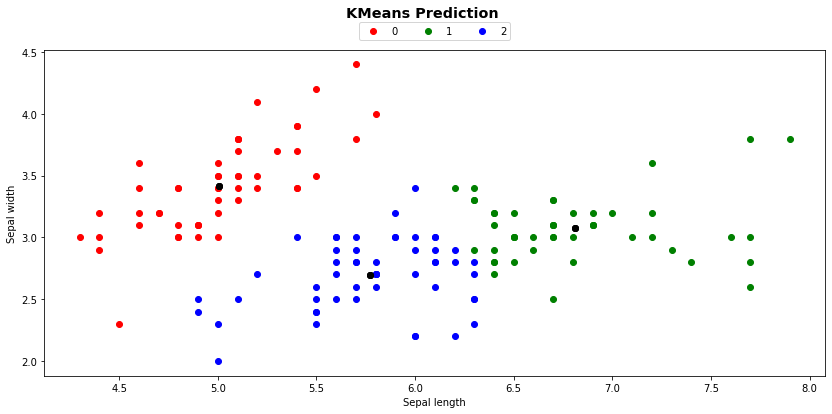

In [26]:
# Input a global title
fig = plt.figure(figsize=(14,6))
st = fig.suptitle("KMeans Prediction",fontsize="x-large", fontweight="bold")

for name, group in df1.groupby("cluster"):   # plot the data by specie. [1]
    # designating specific colours for each group of specie. [2]
    if name==0:
        colors = ['red'] 
    elif name==1:
        colors = ['green']
    else:
        colors = ['blue']
    plt.scatter(group['sepal_length'], group['sepal_width'], label=name, color = colors)
    plt.plot(centre1[:,0], centre1[:,1], 'ko')
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

### 4.4 Real data vs Modelled data

#### 4.4.1 Sepal length vs Sepal width
Below, we compare, side-by-side, the data containing the observed data of specie name with the modelled data for clustering

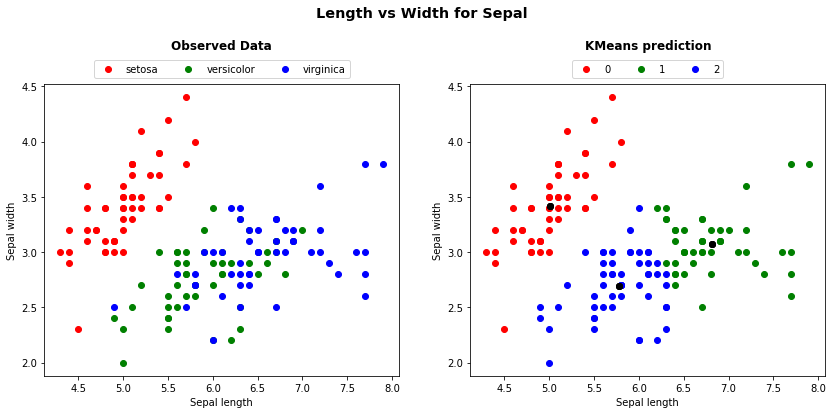

In [27]:
# Input a global title
fig = plt.figure(figsize=(14,6))
st = fig.suptitle("Length vs Width for Sepal", fontsize="x-large", fontweight="bold")

# Plot the ratio of Sepal length to Sepal width
plt.subplot(1,2,1)
for name, group in df.groupby("species"):   # plot the data by specie. [1]
    # designating specific colours for each group of specie. [2]
    if name=='setosa':
        colors = ['red'] 
    elif name=='versicolor':
        colors = ['green']
    else:
        colors = ['blue']
    plt.scatter(group['sepal_length'], group['sepal_width'], label=name, color = colors)
    plt.title("Observed Data",pad=35, fontweight='bold')
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)


# Plot the ratio of Petal length vs Petal width
plt.subplot(1,2,2)

for name, group in df1.groupby("cluster"):   # plot the data by specie. [1]
    # designating specific colours for each group of specie. [2]
    if name==0:
        colors = ['red'] 
    elif name==1:
        colors = ['green']
    else:
        colors = ['blue']
    plt.scatter(group['sepal_length'], group['sepal_width'], label=name, color = colors)
    plt.plot(centre1[:,0], centre1[:,1], 'ko')
    plt.title("KMeans prediction", pad=35, fontweight='bold')
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

# adjusting the size of the subplots to allow for room for the legend at the top of the subplots.
fig.subplots_adjust(left=None, bottom=None, right=None, top=0.8) # [3] 

plt.show()

#### 4.4.2 Petal length vs Petal width
Similarly, we can repeat the exercise for Petal length vs Petal width

In [28]:
# Extract data for sepal length and sepla width from the iris data set
df2 = df.loc[:, ['petal_length', 'petal_width']]

In [29]:
# Perform kmeans fitting, using KMeans algorithm imported with sklearn.cluster [3]
kmeans2 = skcl.KMeans(n_clusters=3, random_state=0).fit(df2)

In [30]:
# Assign labels for each data according to the clusters decided by kmeans algorithm [4] 
cluster2 = pd.Series(kmeans2.labels_)

In [31]:
# Add this cluster column to the data 
df2['cluster'] = pd.Series(kmeans2.labels_)

In [32]:
# Calculate the centre of each cluster
centre2 = kmeans2.cluster_centers_
centre2

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

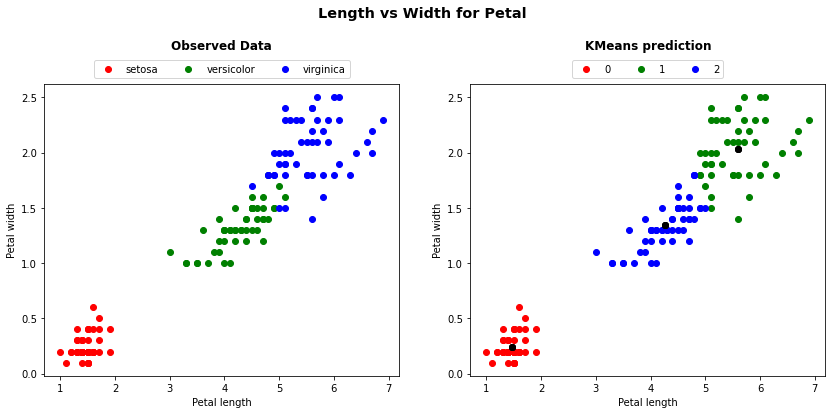

In [33]:
# Input a global title
fig = plt.figure(figsize=(14,6))
st = fig.suptitle("Length vs Width for Petal", fontsize="x-large", fontweight="bold")

# Plot the ratio of Sepal length to Sepal width
plt.subplot(1,2,1)
for name, group in df.groupby("species"):   # plot the data by specie. [1]
    # designating specific colours for each group of specie. [2]
    if name=='setosa':
        colors = ['red'] 
    elif name=='versicolor':
        colors = ['green']
    else:
        colors = ['blue']
    plt.scatter(group['petal_length'], group['petal_width'], label=name, color = colors)
    plt.title("Observed Data",pad=35, fontweight='bold')
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)


# Plot the ratio of Petal length vs Petal width
plt.subplot(1,2,2)

for name, group in df2.groupby("cluster"):   # plot the data by specie. [1]
    # designating specific colours for each group of specie. [2]
    if name==0:
        colors = ['red'] 
    elif name==1:
        colors = ['green']
    else:
        colors = ['blue']
    plt.scatter(group['petal_length'], group['petal_width'], label=name, color = colors)
    plt.title("KMeans prediction", pad=35, fontweight='bold')
    plt.plot(centre2[:,0], centre2[:,1], 'ko')
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

# adjusting the size of the subplots to allow for room for the legend at the top of the subplots
fig.subplots_adjust(left=None, bottom=None, right=None, top=0.8) # [3] 

plt.show()

#### 4.4.3 Analysis of KMeans

By looking very closely at the KMeans prediction plot, the centre of each cluster which was calculated during the running of the algorithm is shown by a black dot. The decision on what cluster any particular data point lies is made based on the distance of that data point from the cluster centres.
Comparing the observed data and the KMeans modelled data for both Sepal and Petal, we can see that the modelled data is very accurate when dealing with clearly different clusters of data. This is proven by the accuracy of identifying all the Setosa speice as one cluster. As a model, it can also be argued that it is relatively accurate when distinguishing between similar data from two different clusters. This can be seen when comparing the Versicolar and Virginica data from the observed data with the KMeans model data. However, for incidences where there is overlap of two clusters, the KMeans alogorithm is not always correct. An example of this is seen in the comparison charts above, where the green and blue clusters are reversed in the KMeans model as from the Observed data. In this case, the reason for this is that when identifying a cluster as cluster no. 1,the algorithm used one of the data points where cluster 1 and cluster 2 overlap as the label identifier, and this particular data point was actually deciphered to be a virginica when, in fact, it was a versicolor.  

The accuracy of KMeans in the case of the iris data set can be measured by comparing the observed specie name data gathered for each flower with what the KMeans cluster data produced.

In [34]:
# copy the data from df3 into a new dataframe, df3
df3 = df2.loc[:, ['petal_length', 'petal_width', 'cluster']]

As stated above, due to one particular innacuracy, The Versicolor cluster were identified as Virginica and vice versa. This does not mean the KMeans is entirely innaccurate. It is relatively accurate in identifying 2 seperate clusters but has just got their names mixed up. Taking this into account, assuming Cluster 0 = Setosa, cluster 1 = Virginica and cluster 2 = Versicolor, we can compare the cluster column and the species column to check the accuracy of the KMeans in the above tests.

In [35]:
# Rename clusters as setosa, versicolor and virginica
df3['cluster'] = df3['cluster'].replace({0: 'setosa', 1: 'virginica', 2: 'versicolor'})

In [36]:
# Add the Species column from the Observed data to the dataframe containing the modelled data
df3['species'] = df.loc[:, ['species']]

# Create a colum that checks if cluster results match observed results
df3['check'] = df3['cluster'] == df3['species']
df3

,petal_length,petal_width,cluster,species,check
0,1.4,0.2,setosa,setosa,True
1,1.4,0.2,setosa,setosa,True
2,1.3,0.2,setosa,setosa,True
3,1.5,0.2,setosa,setosa,True
4,1.4,0.2,setosa,setosa,True
...,...,...,...,...,...
145,5.2,2.3,virginica,virginica,True
146,5.0,1.9,virginica,virginica,True
147,5.2,2.0,virginica,virginica,True
148,5.4,2.3,virginica,virginica,True


In [37]:
# Check how many False predictions there are
df3.check.value_counts()

True     144
False      6
Name: check, dtype: int64

In  the case of Petal lengths vs petal widths, 6 out of 150 data points were modelled incorectly - 4% inacccurate

Repeating the above check for sepal lengths vs sepal widths

In [38]:
# Add the Species column from the Observed data to the dataframe containing the modelled data
df1['species'] = df.loc[:, ['species']]

# Rename clusters as setosa, versicolor and virginica
df1['cluster'] = df1['cluster'].replace({0: 'setosa', 1: 'virginica', 2: 'versicolor'})

# Create a colum that checks if cluster results match observed results
df1['check'] = df1['cluster'] == df1['species']

# Check how many False predictions there are
df1.check.value_counts()

True     123
False     27
Name: check, dtype: int64

Notice, in deaing with sepal length vs sepal width, because there is more variance in sepal length and widths than petal length and widths, the KMeans accuracy for sepals is 82%. This is considerably less than for petals. This illustrates that KMeans is really only reliable and accurate when there are clearly distinguishable data.

### 4.5 Predictions

Using the KMeans model, we can now make predictions of what cluster particular data will fit into

In [39]:
# Create new dummy points for classification.
myxvals = np.linspace(0.5, 7.0, 10)
myyvals = np.linspace(0.5, 2.5, 10)
mynewvals = np.vstack([myxvals, myyvals]).T
mynewvals

array([[0.5       , 0.5       ],
       [1.22222222, 0.72222222],
       [1.94444444, 0.94444444],
       [2.66666667, 1.16666667],
       [3.38888889, 1.38888889],
       [4.11111111, 1.61111111],
       [4.83333333, 1.83333333],
       [5.55555556, 2.05555556],
       [6.27777778, 2.27777778],
       [7.        , 2.5       ]])

In [40]:
# Assuming these are petal lengths and petals widths, predict the cluster for each of the points points 
mypredictions = kmeans2.predict(mynewvals)
mypredictions

array([0, 0, 0, 0, 2, 2, 2, 1, 1, 1])

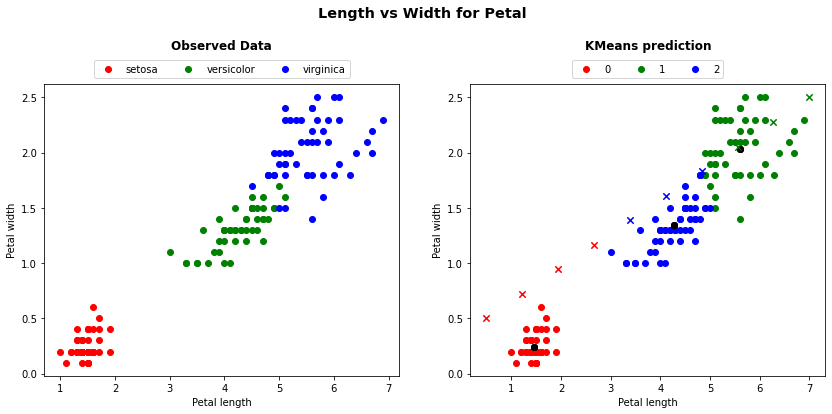

In [41]:
# Input a global title
fig = plt.figure(figsize=(14,6))
st = fig.suptitle("Length vs Width for Petal", fontsize="x-large", fontweight="bold")

# Plot the ratio of Sepal length to Sepal width
plt.subplot(1,2,1)
for name, group in df.groupby("species"):   # plot the data by specie. [1]
    # designating specific colours for each group of specie. [2]
    if name=='setosa':
        colors = ['red'] 
    elif name=='versicolor':
        colors = ['green']
    else:
        colors = ['blue']
    plt.scatter(group['petal_length'], group['petal_width'], label=name, color = colors)
    plt.title("Observed Data",pad=35, fontweight='bold')
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)


# Plot the ratio of Petal length vs Petal width
plt.subplot(1,2,2)

for name, group in df2.groupby("cluster"):   # plot the data by specie. [1]
    # designating specific colours for each group of specie. [2]
    if name==0:
        colors = ['red'] 
    elif name==1:
        colors = ['green']
    else:
        colors = ['blue']
    plt.scatter(group['petal_length'], group['petal_width'], label=name, color = colors)
    plt.title("KMeans prediction", pad=35, fontweight='bold')
    plt.plot(centre2[:,0], centre2[:,1], 'ko')
    #plt.plot(newval[:,0], newval[:,1], 'kx')
    plt.xlabel("Petal length")
    plt.plot(mynewvals[mypredictions == 0][:,0], mynewvals[mypredictions == 0][:,1], 'rx')
    plt.plot(mynewvals[mypredictions == 1][:,0], mynewvals[mypredictions == 1][:,1], 'gx')
    plt.plot(mynewvals[mypredictions == 2][:,0], mynewvals[mypredictions == 2][:,1], 'bx')
    plt.ylabel("Petal width")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

# adjusting the size of the subplots to allow for room for the legend at the top of the subplots
fig.subplots_adjust(left=None, bottom=None, right=None, top=0.8) # [3] 

plt.show()

Applying the 10 new values created to the algorithm, each of the 10 values are plotted with the 'x' indicator on the KMeans chart above. In reviewing this data, we again see the inaccuracies of the KMeans with data that borders two clusters. 

### References
[1] https://stackoverflow.com/questions/45862223/use-different-colors-in-scatterplot-for-iris-dataset <br>
[2] https://stackoverflow.com/questions/39164828/global-legend-for-all-subplots <br>
[3] https://scikit-learn.org/stable/modules/clustering.html <br>
[4] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
[5] https://stackoverflow.com/questions/37842165/sklearn-calculating-accuracy-score-of-k-means-on-the-test-data-set